In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#list of stocks in portfolio
stocks = ['AAPL','AMZN','GOOG','MSFT']

data = pd.DataFrame.from_csv('AAGM.csv')

In [3]:
data.sort_index(inplace=True)

#convert daily stock prices into daily returns
returns = data.pct_change()

In [4]:
returns

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,-0.027855,0.002592,0.019760,-0.018716
2013-01-07,-0.005882,0.035925,-0.004363,-0.001870
2013-01-08,0.002691,-0.007748,-0.001973,-0.005245
2013-01-09,-0.015629,-0.000113,0.006573,0.005650
2013-01-10,0.012396,-0.003792,0.004552,-0.008989
2013-01-11,-0.006132,0.009799,-0.002009,0.013983
2013-01-14,-0.035653,0.017877,-0.022622,0.002237
2013-01-15,-0.031549,-0.003043,0.002323,0.011900


In [5]:
#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

#set number of runs of random portfolio weights
num_portfolios = 25000

#set up array to hold results
results = np.zeros((3,num_portfolios))

In [6]:
results

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [7]:
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.random.random(4)
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]


In [8]:
results

array([[ 0.28671958,  0.28592931,  0.26752884, ...,  0.2732799 ,
         0.29281298,  0.28018971],
       [ 0.18889174,  0.19077495,  0.18800761, ...,  0.1760684 ,
         0.19031534,  0.18211638],
       [ 1.5179043 ,  1.49877809,  1.42296811, ...,  1.55212352,
         1.53856743,  1.53852011]])

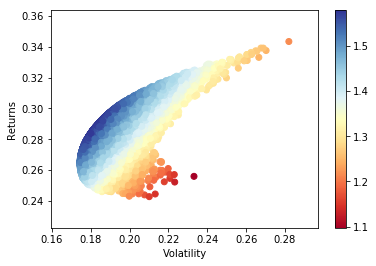

In [9]:
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])

#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.colorbar()
plt.xlabel('Volatility')
plt.ylabel('Returns')
